# Nick Juliano
# Computational Physics | Homework 06

## Problem 1:

Write a shooting method to calculate the Legendre polynomials with n=5.
\begin{eqnarray}
y''=\frac{1}{1-x^2}[2xy'-5*6y] \\
y(0)=0,\ y'(0)=y'_{a},\  n=1,3,...\\
\end{eqnarray}

## Solution:

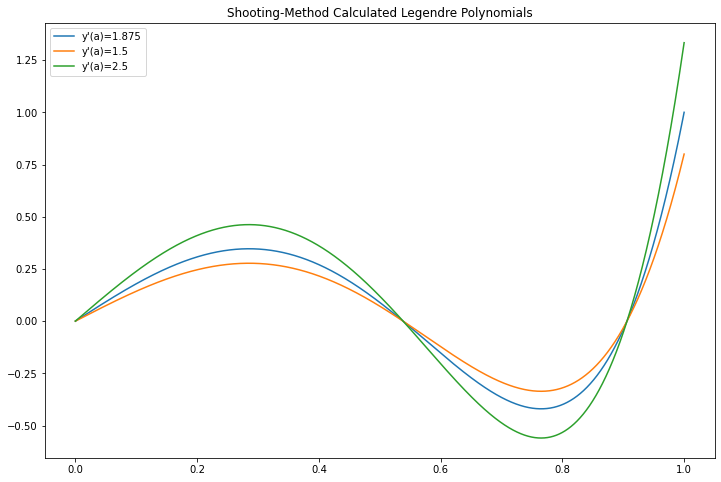

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    """
    Compute the array of of the first order Ordinary Differential Equations
    (adapted from the function given in class)
    
    Parameters
    ----------
    x : float 
        x-position 
    y : array_like
        [y, y']
        
    Returns
    -------
    f : array_like
        [y', y'']
    """
    f=np.zeros(len(y))
    f[0]=y[1]
    f[1]=(1/(1-x**2))*(2*x*y[1]-(5*6*y[0]))
    return f
    
def rk4(x, h, y, n=5):
    """
    Returns the value of state vector y after a single 
    integration interval step h, using the fourth-order
    Runge-Kutta method.
    
    Parameters
    ----------
    x : float
        Independent variable (typically time)
    h : float
        Integration interval step (typically timestep)
    y : array_like
        N-dimensional vector of N unknowns.
    """
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(x,y)
    k2=h*f(x+0.5*h,y+0.5*k1)
    k3=h*f(x+0.5*h,y+0.5*k2)
    k4=h*f(x+h,y+k3)
    y+=(k1+2.*(k2+k3)+k4)/6.
    return y


def run_with_ya(ya):
    """
    Returns plt.plot(x, y) for the initial y'
    
    Parameters
    ----------
    ya : float
        Initial y'
    """
    x=0.
    h=1.0e-4
    y=[0.,ya]    #[y, y']
    xr=[]
    yr=[]
    xend=1
    while(x<1):
        if((x+h)>xend):
            h=xend-x
        if x==1 or x+0.5*h==1 or x+h==1:
            break
        y = rk4(x,h,y)
        xr=np.append(xr,x)
        yr=np.append(yr,y[0])
        x = x+h
    plt.plot(xr, yr, label="y'(a)=" + str(ya))
    return

plt.figure(figsize=[12,8])
run_with_ya(1.875)
run_with_ya(1.5)
run_with_ya(2.5)
plt.title("Shooting-Method Calculated Legendre Polynomials")
plt.legend()
plt.show()

***

## Problem 2:
Use the Forward and Backward Euler Methods to solve a nuclear decay equation.
\begin{eqnarray}
\frac{dy}{dt} &=& -100y \\
dt &=& 1\times 10^{-4},\  1\times 10^{-3},\ 1\times 10^{-2},\ 1\times 10^{-1},\ 1.0
\end{eqnarray}

Plot the results with each different dt, but the same method in the same plot.

## Solution:

The Forward Euler Method computes $y_{n+1}$ as: 

$y_{n+1} = y_{n} + hf(y_{n}, t_{n})$

The Backward Euler Method gives $y_{n+1}$ as: 

$y_{n+1} = y_{n} + hf(y_{n+1}, t_{n+1})$

The nuclear decay equation, $\frac{dy}{dt} = -100y$, gives us $y(t)=y_{0}e^{-100t}$. 

This is general. To evaluate numerically, we know $y(t=0)=y_{0}e^{0}=y_{0}$, and we can define $y_{0}=1000$. We can now follow either version of the Euler Method to solve for $y(t=t+dt)=y_{n+1}$

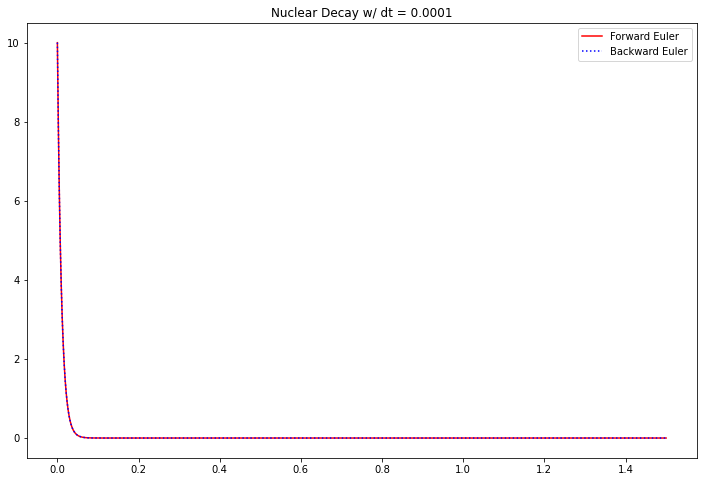

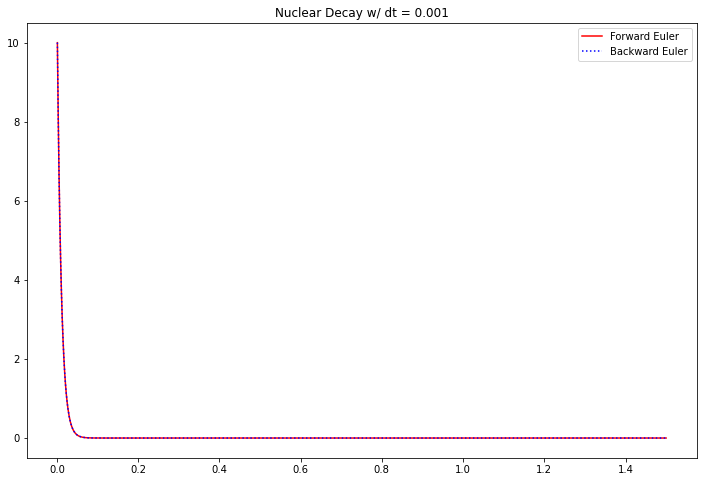

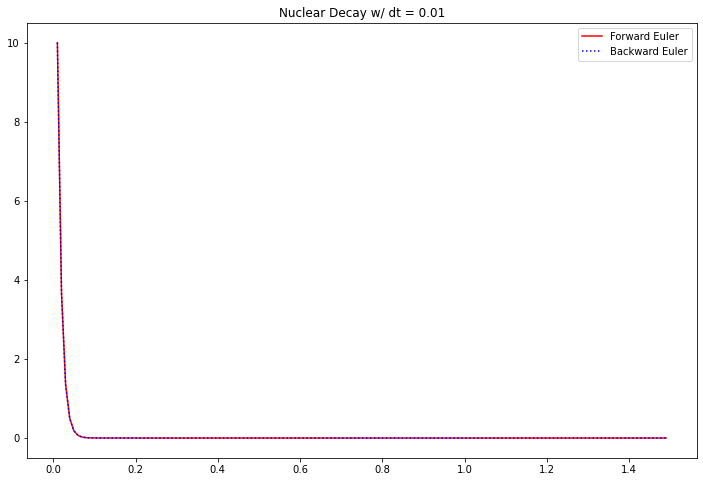

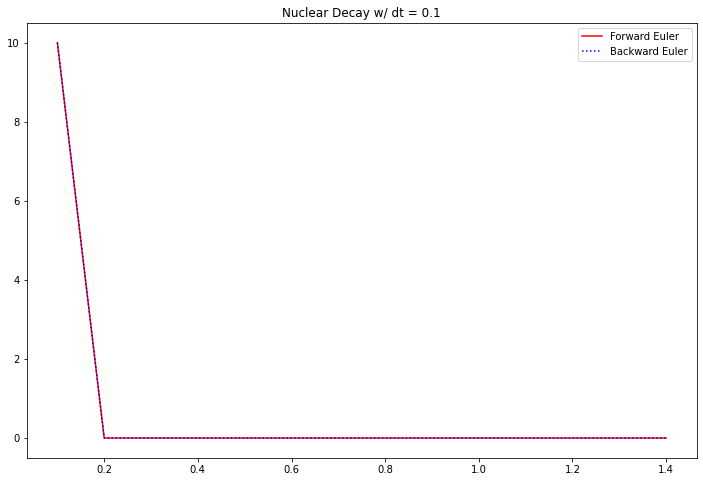

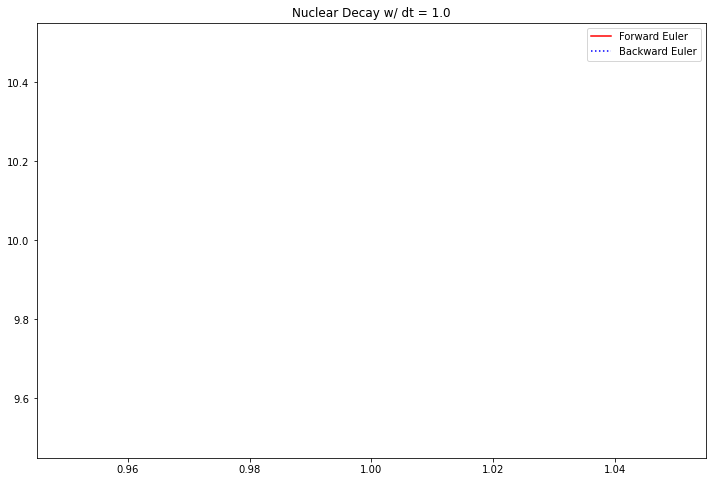

In [2]:
def dydt(y):                  
    return -100*y

def forward(yn,ynp1,dt):          #Forward Euler
    ynp1=yn+dt*dydt(yn)
    return ynp1

def backward(yn,ynp1,dt):         #Backward Euler
    ynp1=yn+dt*dydt(ynp1)
    return ynp1

def run_dt(dt):
    x_for=[]
    y_for=[]
    t=0.
    tf=1.5
    y0=10.  
    yn=y0
    ynp1=y0*np.exp(-100*t)
    
    
    while (t<tf):
        if (t+dt>tf):
            break
        yn=y0*np.exp(-100*t)
        ynp1=y0*np.exp(-100*(t+dt))
        y_for=np.append(y_for,yn)
        
        yn=forward(yn,ynp1,dt)
        t+=dt                    
        x_for=np.append(x_for,t)
    
    x_back=[]
    y_back=[]
    t=0.
    tf=1.5
    y0=10.  
    yn=y0
    ynp1=y0*np.exp(-100*t)
    
    
    while (t<tf):
        if (t+dt>tf):
            break
        yn=y0*np.exp(-100*t)
        ynp1=y0*np.exp(-100*(t+dt))
        y_back=np.append(y_back,yn)
        
        yn=backward(yn,ynp1,dt)
        t+=dt                    
        x_back=np.append(x_back,t)
    plt.figure(figsize=[12,8])
    plt.plot(x_for, y_for, '-', color='r', label="Forward Euler")
    plt.plot(x_back, y_back, ':', color='b', label = "Backward Euler")
    plt.title("Nuclear Decay w/ dt = " + str(dt))
    plt.legend()
    plt.show()
    return

for i in [0.0001, 0.001, 0.01, 0.1, 1.]:
    run_dt(i)